<a href="https://colab.research.google.com/github/ParshwaDand07/Course_Project_2/blob/main/202311011/202311011_MajorProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing Multiclass classification for predicting risk of mortality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,135.0,INTESTINAL INFECTION,0.0,NO PROC,249,"NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Blue Cross,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,Not Span/Hispanic,15,Emergency,Home w/ Home Health Services,2010,231.0,OTHER FRACTURE,61.0,OT OR PRCS VES NOT HEAD,912,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,25,Multiple Significant Trauma,3,Major,Extreme,Surgical,Insurance Company,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2010,42.0,SECONDARY MALIGNANCY,0.0,NO PROC,240,DIGESTIVE MALIGNANCY,6,Diseases and Disorders of the Digestive System,3,Major,Major,Medical,Medicare,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,5,Elective,Home w/ Home Health Services,2010,254.0,REHAB/PROSTH FIT/ADJUST,215.0,OT PHYS THER/REHAB,860,REHABILITATION,23,"Rehabilitation, Aftercare, Other Factors Influ...",2,Moderate,Minor,Medical,Medicare,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,4,Elective,Inpatient Rehabilitation Facility,2010,203.0,OSTEOARTHRITIS,153.0,"HIP REPLACEMENT,TOT/PRT",301,HIP JOINT REPLACEMENT,8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Surgical,Medicare,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [4]:
df.shape

(21379, 38)

In [5]:
df.columns.to_list()

['index',
 'Health Service Area',
 'Hospital County',
 'Operating Certificate Number',
 'Facility ID',
 'Facility Name',
 'Age Group',
 'Zip Code - 3 digits',
 'Gender',
 'Race',
 'Ethnicity',
 'Length of Stay',
 'Type of Admission',
 'Patient Disposition',
 'Discharge Year',
 'CCS Diagnosis Code',
 'CCS Diagnosis Description',
 'CCS Procedure Code',
 'CCS Procedure Description',
 'APR DRG Code',
 'APR DRG Description',
 'APR MDC Code',
 'APR MDC Description',
 'APR Severity of Illness Code',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Source of Payment 1',
 'Source of Payment 2',
 'Source of Payment 3',
 'Attending Provider License Number',
 'Operating Provider License Number',
 'Other Provider License Number',
 'Birth Weight',
 'Abortion Edit Indicator',
 'Emergency Department Indicator',
 'Total Charges',
 'Total Costs']

In [6]:
df.isnull().sum()

index                                      0
Health Service Area                        0
Hospital County                            0
Operating Certificate Number               0
Facility ID                                0
Facility Name                              0
Age Group                                  0
Zip Code - 3 digits                        5
Gender                                     0
Race                                       0
Ethnicity                                  0
Length of Stay                             0
Type of Admission                          0
Patient Disposition                        0
Discharge Year                             0
CCS Diagnosis Code                       243
CCS Diagnosis Description                243
CCS Procedure Code                       243
CCS Procedure Description                243
APR DRG Code                               0
APR DRG Description                        0
APR MDC Code                               0
APR MDC De

In [7]:
df['Emergency Department Indicator'].value_counts()

N    11087
Y    10292
Name: Emergency Department Indicator, dtype: int64

## Checking mapping of some columns with disease type

In [8]:
filtered_data = df[df['Emergency Department Indicator'] == 'Y']

# Get unique values of 'APR DRG CODE' from the filtered data
unique_apr_drg_codes = filtered_data['APR DRG Code'].unique()

print(len(unique_apr_drg_codes))

260


In [9]:
filtered_data = df[df['Emergency Department Indicator'] == 'N']

# Get unique values of 'APR DRG CODE' from the filtered data
unique_apr_drg_codes = filtered_data['APR DRG Code'].unique()

print(len(unique_apr_drg_codes))

298


In [10]:
len(df['APR DRG Code'].unique())

304

In [11]:
unique_apr_drg_codes_by_risk = df.groupby('APR Risk of Mortality')['APR DRG Code'].unique()

print(unique_apr_drg_codes_by_risk)

APR Risk of Mortality
Extreme     [912, 44, 136, 589, 55, 347, 174, 816, 21, 952...
Major       [240, 5, 4, 343, 663, 951, 308, 191, 165, 661,...
Minor       [249, 860, 301, 930, 812, 342, 227, 754, 56, 7...
Moderate    [912, 173, 711, 55, 425, 161, 139, 207, 5, 54,...
Name: APR DRG Code, dtype: object


In [12]:
for i in unique_apr_drg_codes_by_risk:
    print(f"{len(i)}")

174
234
285
274


Now we know that risk of mortality is not strictly determine by type of disease

## Dropping columns and null values

In [13]:
df.describe()

,index,Operating Certificate Number,Facility ID,Zip Code - 3 digits,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,21379.000000,21379.0,21379.0,21374.000000,21379.0,21136.000000,21136.000000,21379.000000,21379.000000,21379.000000,21379.000000,1.348200e+04,7.016000e+03,21379.000000,2.137900e+04,21379.000000
mean,10689.000000,101000.0,1.0,120.859081,2010.0,174.571300,74.635929,373.957435,9.334908,2.054072,195328.194116,2.711644e+05,8.121235e+05,279.676318,3.538869e+04,12456.009997
std,6171.730038,0.0,0.0,1.590154,0.0,120.685661,77.706345,242.745193,5.959573,0.914522,59030.540647,2.548756e+06,6.797795e+06,944.127686,5.805325e+04,19740.026164
min,0.000000,101000.0,1.0,100.000000,2010.0,1.000000,0.000000,4.000000,0.000000,0.000000,2733.000000,2.733000e+03,4.630000e+02,0.000000,1.250000e+02,20.810000
25%,5344.500000,101000.0,1.0,120.000000,2010.0,106.000000,0.000000,174.000000,5.000000,1.000000,169766.000000,1.626900e+05,1.495510e+05,0.000000,1.057924e+04,3577.755000
50%,10689.000000,101000.0,1.0,121.000000,2010.0,157.000000,54.000000,310.000000,8.000000,2.000000,210898.000000,1.991580e+05,1.822020e+05,0.000000,1.945739e+04,6584.090000
75%,16033.500000,101000.0,1.0,122.000000,2010.0,218.000000,137.000000,560.000000,14.000000,3.000000,237382.000000,2.287440e+05,2.169510e+05,0.000000,3.736032e+04,13848.285000
max,21378.000000,101000.0,1.0,123.000000,2010.0,670.000000,231.000000,956.000000,25.000000,4.000000,259085.000000,9.052736e+07,9.042875e+07,9900.000000,1.293466e+06,418013.490000


removing useless columns, removing discharge year as it is mostly 2010, removing some descriptive columns whose codes are available, removing columns with very large number of null values

In [14]:
columns_to_drop = ['index','Discharge Year', 'CCS Diagnosis Description', 'CCS Procedure Description','APR DRG Description','APR MDC Description','APR Severity of Illness Description','Source of Payment 3','Other Provider License Number','Source of Payment 2','Operating Provider License Number','Facility Name']

new_df = df.drop(columns=columns_to_drop, axis=1)

In [15]:
new_df.columns.to_list(), len(new_df.columns)

(['Health Service Area',
  'Hospital County',
  'Operating Certificate Number',
  'Facility ID',
  'Age Group',
  'Zip Code - 3 digits',
  'Gender',
  'Race',
  'Ethnicity',
  'Length of Stay',
  'Type of Admission',
  'Patient Disposition',
  'CCS Diagnosis Code',
  'CCS Procedure Code',
  'APR DRG Code',
  'APR MDC Code',
  'APR Severity of Illness Code',
  'APR Risk of Mortality',
  'APR Medical Surgical Description',
  'Source of Payment 1',
  'Attending Provider License Number',
  'Birth Weight',
  'Abortion Edit Indicator',
  'Emergency Department Indicator',
  'Total Charges',
  'Total Costs'],
 26)

In [16]:
new_df['Total Costs'].corr(new_df['Total Charges'])

0.9448272644657139

these columns are highly correlated , removing Total Charges column

In [17]:
new_df = new_df.drop(columns=['Total Charges'], axis=1)

Fixing zip code column

In [18]:
new_df['Zip Code - 3 digits'].unique()

array([ nan, 100., 101., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123.])

In [19]:
new_df[new_df['Zip Code - 3 digits'] == 'OOS'] = np.nan

In [20]:
new_df['Zip Code - 3 digits'] = pd.to_numeric(new_df['Zip Code - 3 digits'], errors='ignore')

In [21]:
new_df['Zip Code - 3 digits'].unique()

array([ nan, 100., 101., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123.])

In [22]:
new_df['Zip Code - 3 digits'].isna().sum()

5

In [23]:
tempdf = new_df[new_df['Length of Stay'] == '120 +' ]
len(tempdf)

17

In [24]:
new_df.loc[new_df['Length of Stay'] == '120 +', 'Length of Stay'] = 120

In [25]:
new_df['Length of Stay'] = pd.to_numeric(new_df['Length of Stay'], errors='ignore')

In [26]:
new_df['Health Service Area'].unique()

array(['Capital/Adiron'], dtype=object)

In [27]:
unique_codes = new_df.groupby('Zip Code - 3 digits')['Health Service Area'].unique()

print(unique_codes)

Zip Code - 3 digits
100.0    [Capital/Adiron]
101.0    [Capital/Adiron]
103.0    [Capital/Adiron]
104.0    [Capital/Adiron]
105.0    [Capital/Adiron]
106.0    [Capital/Adiron]
107.0    [Capital/Adiron]
108.0    [Capital/Adiron]
109.0    [Capital/Adiron]
110.0    [Capital/Adiron]
111.0    [Capital/Adiron]
112.0    [Capital/Adiron]
113.0    [Capital/Adiron]
114.0    [Capital/Adiron]
115.0    [Capital/Adiron]
116.0    [Capital/Adiron]
117.0    [Capital/Adiron]
118.0    [Capital/Adiron]
119.0    [Capital/Adiron]
120.0    [Capital/Adiron]
121.0    [Capital/Adiron]
122.0    [Capital/Adiron]
123.0    [Capital/Adiron]
Name: Health Service Area, dtype: object


In [28]:
new_df['Hospital County'].isna().sum()

0

since we have zip codes we dont need health service area

In [29]:
new_df = new_df.drop(columns=['Health Service Area'], axis=1)

In [30]:
df2 = new_df[new_df['Hospital County'].isna()]

In [31]:
df2['Gender'].value_counts(),df2['Abortion Edit Indicator'].value_counts(), df2.shape

(Series([], Name: Gender, dtype: int64),
 Series([], Name: Abortion Edit Indicator, dtype: int64),
 (0, 24))

removing rows that contain only NaN values

In [32]:
new_df = new_df.dropna(how='all')

In [33]:
new_df.shape

(21379, 24)

In [34]:
new_df.isna().sum()

Hospital County                        0
Operating Certificate Number           0
Facility ID                            0
Age Group                              0
Zip Code - 3 digits                    5
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
CCS Diagnosis Code                   243
CCS Procedure Code                   243
APR DRG Code                           0
APR MDC Code                           0
APR Severity of Illness Code           0
APR Risk of Mortality                  1
APR Medical Surgical Description       0
Source of Payment 1                    0
Attending Provider License Number      0
Birth Weight                           0
Abortion Edit Indicator                0
Emergency Department Indicator         0
Total Costs                            0
dtype: int64

In [35]:
df2 = new_df[new_df['Hospital County'].isna()]

In [36]:
df2['APR DRG Code'].value_counts(), df2['Gender'].value_counts()

(Series([], Name: APR DRG Code, dtype: int64),
 Series([], Name: Gender, dtype: int64))

In [37]:
df2.isna().sum()

Hospital County                      0.0
Operating Certificate Number         0.0
Facility ID                          0.0
Age Group                            0.0
Zip Code - 3 digits                  0.0
Gender                               0.0
Race                                 0.0
Ethnicity                            0.0
Length of Stay                       0.0
Type of Admission                    0.0
Patient Disposition                  0.0
CCS Diagnosis Code                   0.0
CCS Procedure Code                   0.0
APR DRG Code                         0.0
APR MDC Code                         0.0
APR Severity of Illness Code         0.0
APR Risk of Mortality                0.0
APR Medical Surgical Description     0.0
Source of Payment 1                  0.0
Attending Provider License Number    0.0
Birth Weight                         0.0
Abortion Edit Indicator              0.0
Emergency Department Indicator       0.0
Total Costs                          0.0
dtype: float64

In [38]:
temp_df = new_df[new_df['Gender'] == 'F']

In [39]:
cols = ['Hospital County','Operating Certificate Number','Facility ID','Attending Provider License Number']

for col in cols:
    new_df[col] = new_df[col].fillna(temp_df[col].mode()[0])

In [40]:
cols = ['Zip Code - 3 digits','Patient Disposition','CCS Diagnosis Code','CCS Procedure Code','APR Risk of Mortality']
for col in cols:
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])

In [41]:
new_df.shape

(21379, 24)

removing outliers from Total costs column

In [42]:
for i in range(4):
    new_df = new_df.drop(new_df['Total Costs'].idxmax())

In [43]:
new_df['Total Costs'].max()

341413.08

## Data Visualizations

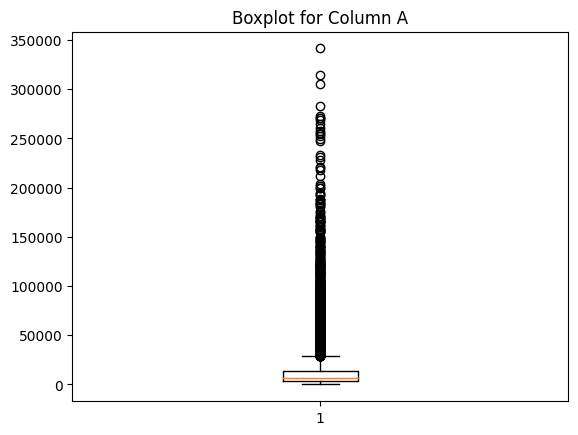

In [44]:
plt.boxplot(new_df['Total Costs'])#, showfliers = False)
plt.title('Boxplot for Column A')
plt.show()

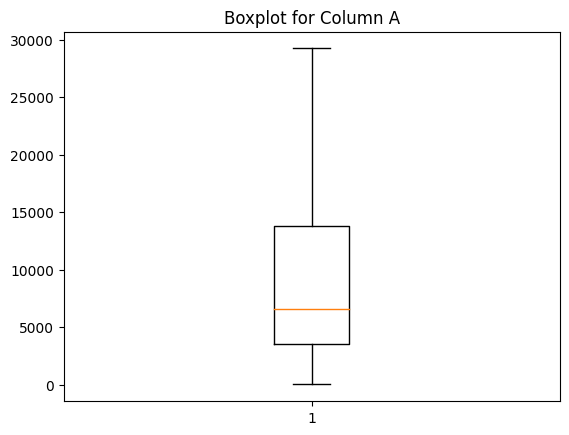

In [45]:
plt.boxplot(new_df['Total Costs'], showfliers = False)
plt.title('Boxplot for Column A')
plt.show()

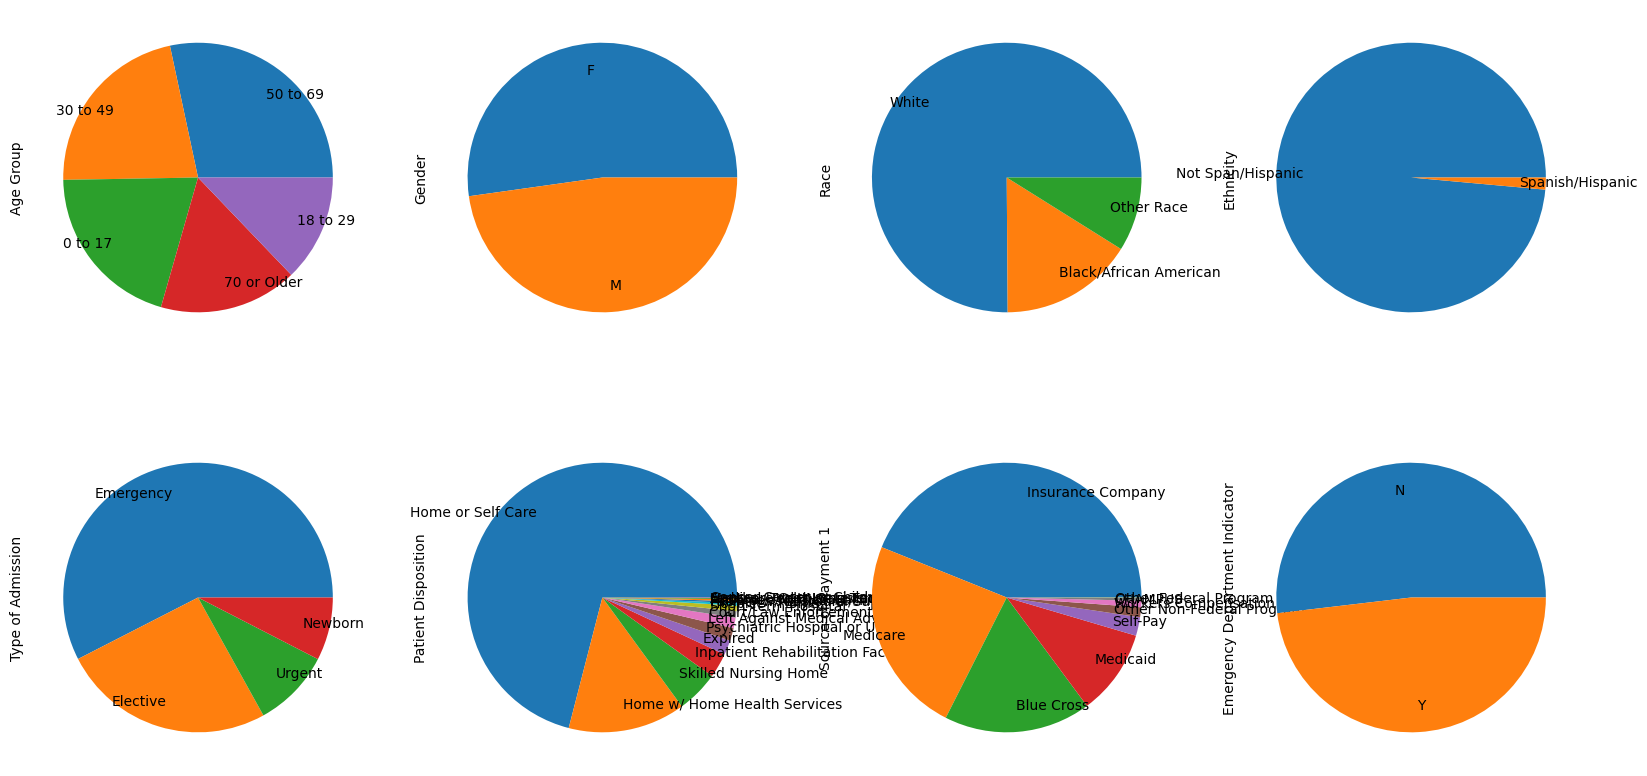

In [46]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for axid, col in enumerate(['Age Group','Gender','Race','Ethnicity','Type of Admission','Patient Disposition','Source of Payment 1','Emergency Department Indicator']):
    col_dist = new_df[col].value_counts()
    col_dist.plot(kind = 'pie',  ax=ax[int(axid/4), axid%4], labeldistance = 0.8)

## Scaling and encoding columns

In [47]:
label_encoder = preprocessing.LabelEncoder()

cols = ['Hospital County', 'Age Group','Gender', 'Race', 'Ethnicity','Type of Admission', 'Patient Disposition','APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1','Abortion Edit Indicator','Emergency Department Indicator']

for col in cols:
    new_df[col]= label_encoder.fit_transform(new_df[col])

In [48]:
new_df.dtypes

Hospital County                        int64
Operating Certificate Number         float64
Facility ID                          float64
Age Group                              int64
Zip Code - 3 digits                  float64
Gender                                 int64
Race                                   int64
Ethnicity                              int64
Length of Stay                         int64
Type of Admission                      int64
Patient Disposition                    int64
CCS Diagnosis Code                   float64
CCS Procedure Code                   float64
APR DRG Code                         float64
APR MDC Code                         float64
APR Severity of Illness Code         float64
APR Risk of Mortality                  int64
APR Medical Surgical Description       int64
Source of Payment 1                    int64
Attending Provider License Number    float64
Birth Weight                         float64
Abortion Edit Indicator                int64
Emergency 

# Train test split and model training

In [71]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [50]:
data_df = new_df[['Hospital County', 'Operating Certificate Number', 'Facility ID',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code',
       'APR MDC Code', 'APR Severity of Illness Code',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Attending Provider License Number', 'Birth Weight',
       'Abortion Edit Indicator', 'Emergency Department Indicator',
       'Total Costs']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data_df, new_df['APR Risk of Mortality'], random_state=42, test_size=0.20)

In [52]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((17100, 23), (4275, 23))

In [61]:
params_logistic = {
                'multi_class': ['ovr', 'multinomial'],
                'C':[0.1, 1, 1.5, 3, 10],
                'penalty':[ 'l2'],
                'solver':['lbfgs',  'newton-cg',  'sag', 'saga']

             }

In [62]:
logistc_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=params_logistic, scoring='accuracy', cv=3)
logistc_reg.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 1.5, 3, 10],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [56]:
print("tuned hpyerparameters :(best parameters) ",logistc_reg.best_params_)
print("best score :",logistc_reg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 3, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
best score : 0.7630994152046784


## Evaluation metrics

In [68]:
y_pred = logistc_reg.predict(X_test_scaled )

In [79]:
print(f"accuracy : {accuracy_score(y_test, y_pred)}")
print(f"recall : {recall_score(y_test, y_pred, average='weighted')}")
print(f"precision : {precision_score(y_test, y_pred, average='weighted')}")
print(f"f1 score : {f1_score(y_test, y_pred, average='weighted')}")


accuracy : 0.7550877192982456
recall : 0.7550877192982456
precision : 0.7394302976245558
f1 score : 0.7428160820172108
